# Multivariate Source Use Case (Single DataFrameCase)

In this vignette I will represent a use case of the Source Multivariate Entropy Triangle with some individual Databases

### Importing Libraries

As the functions for the entopies measures are stored in other domain, first we will need to access those modules with the functions and the import all the necessary functions

In [1]:
# Bring your packages onto the path
import sys,os
sys.path.append(os.path.abspath(os.path.join('..'))) #'entropytriangle main directory

In [2]:
from entropytriangle import * #importing all modules necessary for the plotting

### Dowloading a set of Databases

In [6]:
df = pd.read_csv('Arthritis.csv',delimiter=',',index_col='Unnamed: 0')
#df = pd.read_csv('Breast_data.csv',delimiter=',',index_col='Unnamed: 0').drop(['Sample code number'],axis = 1).replace('?',np.nan) # in this DB the missing values are represented as '?' 
#df = pd.read_csv('Glass.csv',delimiter=',')
#df = pd.read_csv('Ionosphere.csv',delimiter=',')
#df = pd.read_csv('Iris.csv',delimiter=',',index_col='Id')
#df = pd.read_csv('Wine.csv',delimiter=',').drop(['Wine'],axis = 1)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1 to 84
Data columns (total 5 columns):
ID           84 non-null int64
Treatment    84 non-null object
Sex          84 non-null object
Age          84 non-null int64
Improved     84 non-null object
dtypes: int64(2), object(3)
memory usage: 3.9+ KB


In [8]:
df.head(10)

,ID,Treatment,Sex,Age,Improved
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked
6,23,Treated,Male,58,Marked
7,75,Treated,Male,59,None
8,39,Treated,Male,59,Marked
9,33,Treated,Male,63,None
10,55,Treated,Male,63,None


### Discretizing the Data before entropy calculation

We have defined a function for discretizing a hole dataset, the function divides de entries in 
"NROWS(DF)^(1/3)" equally sized spaces, and turn the data types in "categories"

In [9]:
df = discretization(df)

/Users/jaime.de.los.rios/Documents/GitHub/entropytriangle/entropytriangle/auxfunc.py:37: UserWarning: Discretizing data!
  warning("Discretizing data!")


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1 to 84
Data columns (total 5 columns):
ID           84 non-null category
Treatment    84 non-null category
Sex          84 non-null category
Age          84 non-null category
Improved     84 non-null category
dtypes: category(5)
memory usage: 1.7 KB


In [11]:
df.head(10)

,ID,Treatment,Sex,Age,Improved
1,2,1,1,0,2
2,2,1,1,0,1
3,3,1,1,0,1
4,0,1,1,0,0
5,1,1,1,1,0
6,1,1,1,2,0
7,3,1,1,2,1
8,1,1,1,2,0
9,1,1,1,3,1
10,2,1,1,3,1


### Source Entropies Measures calculation

Once we have our data discretized, we will start by calculating the values of the entropies for the posterior plots 

In [12]:
'''
As the database is previosly discretized we won´t need the values of the bins
'Type variable select the entropy calculation:'
    Total: Total source entropy decomposition (CPx)
    Dual : Dual source entropy decomposition (DPx instead of CPx)
'''

edf = sentropies(df , type = 'total' , base = 2) 

In [13]:
edf

,H_Uxi,H_Pxi,DeltaH_Pxi,M_Pxi,VI_Pxi
Name,,,,,
ID,2.000000,2.000000,0.000000,0.886905,1.113095
Treatment,1.000000,0.999591,0.000409,0.615488,0.384103
Sex,1.000000,0.878361,0.121639,0.531701,0.346660
Age,2.000000,1.870869,0.129131,0.944409,0.926460
Improved,1.584963,1.459148,0.125815,1.006767,0.452381
AGGREGATE,7.584963,7.207968,0.376994,3.985270,3.222698


### Source Entropies Entropy Triangle Plotting

The last step will be plotting the values calculated previously. The coordinates will be calculated multiplying the normalized values needed by the scale used for plotting the triangle, and will appear behind the triangle plot for comparission

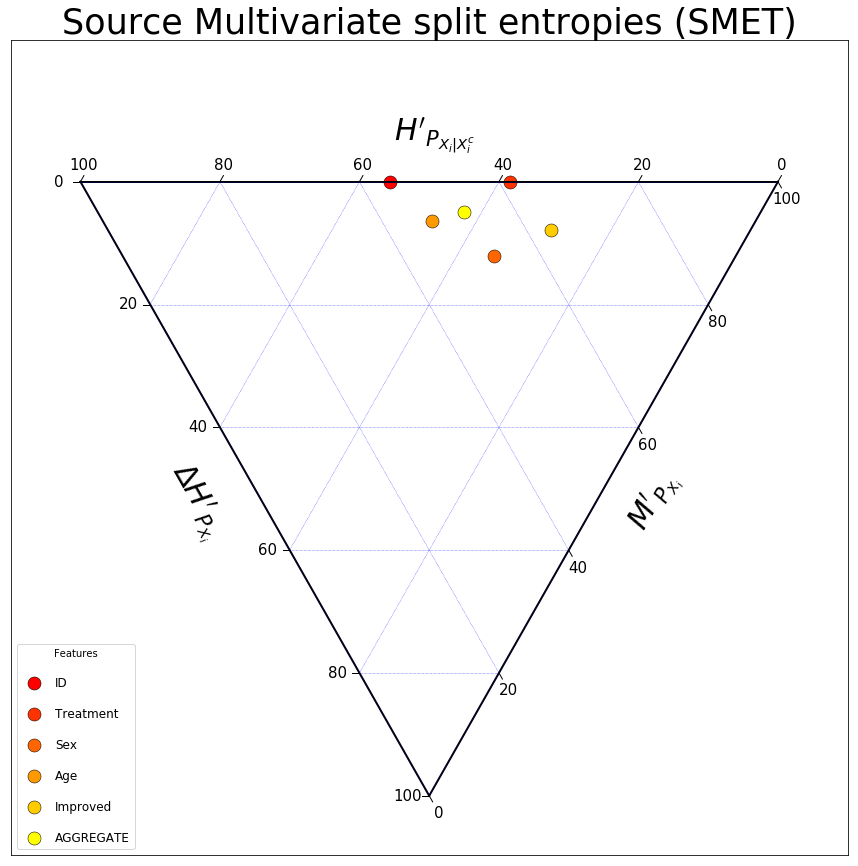

[array([ 0.        , 44.34526435, 55.65473565]),
 array([4.08965811e-02, 6.15487909e+01, 3.84103125e+01]),
 array([12.16390612, 53.17012307, 34.66597081]),
 array([ 6.45657229, 47.22042778, 46.32299993]),
 array([ 7.93801643, 63.51992329, 28.54206028]),
 array([ 4.9702824 , 52.54172248, 42.48799512])]

In [14]:
etplot(edf,s_mk=170, pltscale=15 , gridl = 20)